# Hotel Recommendations and Sentimental Analysis

# *Importing Modules*

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import  WordCloud,STOPWORDS
import string
import random
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics.pairwise import linear_kernel  # Changing values from 0 to 1

In [238]:
data = pd.read_csv(open("cleaned_hotel_dataset.csv",errors = 'replace',encoding = "UTF-8"))

# Recommender System

### There are two main types of Recommender Systems : Collaborative-Filtering and Content-Based.

- I have used KNearestNeighbors to find the most similar text compare to a certain text. By using cosine similarity, I can measure the similarity distance(How closely they are related) between the texts.

- I also used linear kernels to compare two text vectors to get their similarities. By using these values, I can get a list of similar hotels.

## *Collaborative-Filtering Recommder System*

In [239]:
data_recsys = data[['name','reviews.username','reviews.rating']]

In [240]:
data_recsys

,name,reviews.username,reviews.rating
0,Little Paradise Hotel,Flo H,5.0
1,Little Paradise Hotel,Julie R,5.0
2,Little Paradise Hotel,martin n,5.0
3,Little Paradise Hotel,shetravels66,5.0
4,Little Paradise Hotel,Mary Ellen R,5.0
...,...,...,...
28754,Elk Springs Resort,randolphtiffany,5.0
28755,Elk Springs Resort,Sabrina P,5.0
28756,Elk Springs Resort,Chelsa K.,5.0
28757,Elk Springs Resort,Heather D.,5.0


### Making a pivot table

In [241]:
data_piv = data_recsys.pivot_table(index = 'name', values = 'reviews.rating', columns = 'reviews.username').fillna(0)

In [242]:
data_piv

reviews.username,'Kim L,000guest2016,0704couple,0MLB,0gerganam,100virginiaw,10197701,101andya,1021complete,103jeremiahw,...,zumaqueen,zzixor1,Анастасия Г,Дмєӏѥ Ѵ,安管家,������ ������,��������Gregor�������� van der Mark,���������,🇭🇺Gregor🇹🇷 van der Mark,🎀Kaylee🎀
name,,,,,,,,,,,,,,,,,,,,,
1785 Inn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900 House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40 Berkeley Hostel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bed & Breakfast In Cambridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ambassadors Inn and Suites,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wingate By Wyndham Chantilly / Dulles Airport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wingate By Wyndham Lagrange,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wingate By Wyndham Pueblo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting the pivot table into sparse matrix

In [243]:
matrix = csr_matrix(data_piv)

### Using the cosin similarities to find similar list of hotels

In [244]:
knn = NearestNeighbors(metric = 'cosine',algorithm = 'brute')  # Using Brute Force Search Algorithm

In [245]:
knn.fit(matrix)
matrix.shape

(407, 12410)

- Now, the recommender system model is ready, let's pick a random hotel from the data and observe it's recommendations

### Hotel Recommendations

In [246]:
random_data = 123

In [247]:
similarities,indices = knn.kneighbors(data_piv.iloc[random_data,:].values.reshape(1,-1),n_neighbors = 11)

In [248]:
def recommending(data_piv,random_data,similarities,indices):
    length = len(similarities.flatten())
    result = []
    for i in range(1,length):
        name = data_piv.index[indices.flatten()[i]]
        result.append(name)
    
    return pd.DataFrame(recommending2(data_piv,random_data,similarities,indices),columns=['Hotels Recommended'])

In [249]:
recommending(data_piv,random_data,similarities,indices)

Recommending Hotels Similar to : Doubletree By Hilton Hotel Bay City - Riverfront

The Top 10 Recommendations are :



,Hotels Recommended
0,Days Inn Branson / Near The Strip
1,Howard Johnson Inn Columbia
2,Courtyard By Marriott Downtown Boise
3,Fairfield Inn By Marriott Binghamton
4,Holiday Inn Express Hotel and Suites Meadowlan...
5,Greenstay Hotel and Suites
6,Merritt House Inn
7,Super 8 Manhattan Ks
8,Super 8 Longmont / Del Camino
9,"The Alexandrian, Autograph Collection"


# *Content-Based Recommender System*

### Combining all the related text columns into one description column

In [250]:

data['description'] = data[['address', 'city', 'name','province','reviews.text','reviews.title']].apply(
    lambda x: ' '.join(x.fillna('').astype(str)),axis=1)



In [251]:
data_group = data.groupby('name')['description'].apply(lambda x: x.sum()).reset_index()
data_group = pd.DataFrame(data_group)
data_group

,name,description
0,1785 Inn,3582 White Mountain Hwy North Conway 1785 Inn ...
1,1900 House,59 Kingstown Rd Narragansett 1900 House Galile...
2,40 Berkeley Hostel,40 Berkeley St Boston 40 Berkeley Hostel MA We...
3,A Bed & Breakfast In Cambridge,1657 Cambridge St Cambridge A Bed & Breakfast ...
4,Ambassadors Inn and Suites,716 21st St Virginia Beach Ambassadors Inn and...
...,...,...
402,Wingate By Wyndham Chantilly / Dulles Airport,3940 Centerview Dr Chantilly Wingate By Wyndha...
403,Wingate By Wyndham Lagrange,103 Wingate Ter Lagrange Wingate By Wyndham La...
404,Wingate By Wyndham Pueblo,4711 N Elizabeth Pueblo Wingate By Wyndham Pue...
405,Wyndham Resort At Fairfield Mountains,747 Buffalo Creek Rd Lake Lure Wyndham Resort ...


### Converting  the description to vectors by using TfidfVectorizer

In [252]:

tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode',analyzer = 'word',ngram_range = (1,4),stop_words = 'english')

In [253]:
data_tfv = tfv.fit_transform(data_group['description'])

### By using linear kernel, I compare the text vectors to each other and receive a relativity probabilities between those two.

In [254]:
lin = linear_kernel(data_tfv,data_tfv)

In [255]:
lin

array([[1.        , 0.03551677, 0.0117856 , ..., 0.01330321, 0.04916012,
        0.06263201],
       [0.03551677, 1.        , 0.01319321, ..., 0.01643263, 0.04715386,
        0.0261534 ],
       [0.0117856 , 0.01319321, 1.        , ..., 0.02175093, 0.010146  ,
        0.00952289],
       ...,
       [0.01330321, 0.01643263, 0.02175093, ..., 1.        , 0.18327808,
        0.10532127],
       [0.04916012, 0.04715386, 0.010146  , ..., 0.18327808, 1.        ,
        0.15414022],
       [0.06263201, 0.0261534 , 0.00952289, ..., 0.10532127, 0.15414022,
        1.        ]])

In [256]:
indices = pd.Series(data_group.index, index = data_group['name']).drop_duplicates()

### Making a pipeline of Content-Based Recommender System

In [257]:
def recommendation_content(title,lin=lin):
    idx = indices[title]
    recsys = list(enumerate(lin[idx]))
    recsys = sorted(recsys,key = lambda x:x[1],reverse =True)
    # Shows top 10 recommendations
    recsys = recsys[1:11]
    
    # Top 10 indices
    similarity_score = [i[0] for i in recsys]
    
    return data_group['name'].iloc[similarity_score]

### Testing the Content-Based Recommender System

In [258]:
# random testing

random_hotel = data.iloc[354]['name']
print("The random hotel's name is : {} ".format(random_hotel))

The random hotel's name is : Best Western Plus Waterville Grand Hotel 


### Top 10 Most Similar Hotels List

In [259]:
content_recommendations_top10=pd.DataFrame(recommendation_content(random_hotel).values,columns={'Hotel Name'}).reset_index().drop('index',axis = 1)
content_recommendations_top10

,Hotel Name
0,Best Western Plus San Marcos Inn
1,Best Western Plus Arlington North Hotel and Su...
2,Best Western Plus Circle Inn
3,Best Western Plus Kelly Inn
4,Best Western Plus French Quarter Landmark Hotel
5,Best Western Hospitality Hotel and Suites
6,Best Western Eufaula Inn
7,Antlers Inn
8,Best Western Owasso Inn & Suites
9,Hampton Inn Grand Junction Downtown/historic M...


## Evaluations On The Content-Based Recommender System

- By using wordclouds, to detect the similar words between 'Best Western Plus Waterville Grand Hotel' and it's similar hotels.

In [260]:
content_recommendations_top10 = content_recommendations_top10['Hotel Name'].astype(str)

In [261]:
# Randomly choose 3 hotels in the top 10 recommendations
ran_num =random.sample(range(0,9), 3)

### WordClouds

In [262]:
# generating wordcloud respect to it's index
def generate_wordcloud(i):
    wordcloud = WordCloud(width = 1000, height = 1000,background_color = 'black',stopwords=set(STOPWORDS)).generate(" ".join(data_group[data_group['name'] == content_recommendations_top10[i] ]['description'].values))
    return wordcloud

Best Western Plus Waterville Grand Hotel


(-0.5, 999.5, 999.5, -0.5)

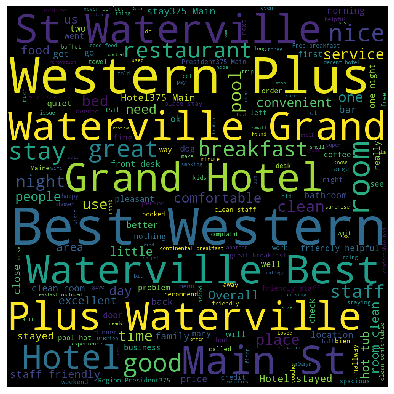

In [263]:
# wordcloud of 'Best Western Plus Waterville Grand Hotel'

plt.figure(figsize=(10,7))
wordcloud_bwpwgh = WordCloud(width=1000,height=1000, background_color='black',stopwords=set(STOPWORDS)).generate(" ".join(data_group[data_group['name'] == 'Best Western Plus Waterville Grand Hotel']['description'].values))
print('Best Western Plus Waterville Grand Hotel')
plt.imshow(wordcloud_bwpwgh)
plt.axis('off')

Antlers Inn


(-0.5, 999.5, 999.5, -0.5)

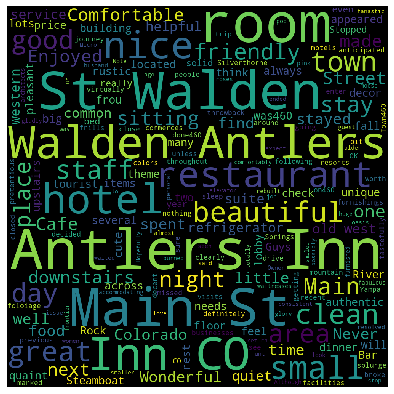

In [264]:
# Let's compare random 3 places with the selected hotel
wordcloud = generate_wordcloud(ran_num[0])
plt.figure(figsize = (10,7))
print(content_recommendations_top10[ran_num[0]])
plt.imshow(wordcloud)
plt.axis('off')
    

Best Western Plus French Quarter Landmark Hotel


(-0.5, 999.5, 999.5, -0.5)

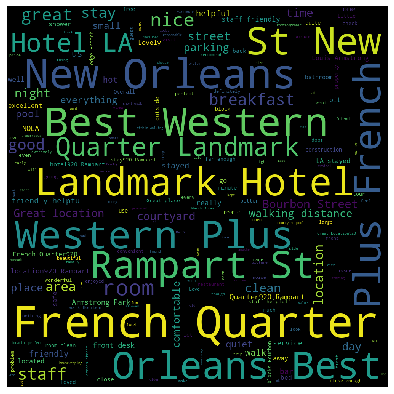

In [265]:
wordcloud = generate_wordcloud(ran_num[1])
plt.figure(figsize = (10,7))
print(content_recommendations_top10[ran_num[1]])
plt.imshow(wordcloud)
plt.axis('off')

Best Western Owasso Inn & Suites


(-0.5, 999.5, 999.5, -0.5)

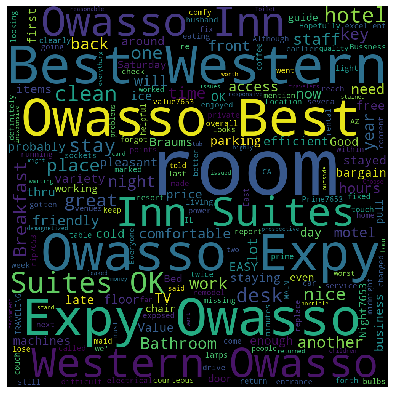

In [266]:
wordcloud = generate_wordcloud(ran_num[2])
plt.figure(figsize = (10,7))
print(content_recommendations_top10[ran_num[2]])
plt.imshow(wordcloud)
plt.axis('off')

- All 4 word clouds have identical words: 'Best','Western' and 'Plus'
- As the recommendations were made solely based on the hotel's name, reviews, review title, and the locations, therefore, the majority of the recommended hotels had similar names with similar reviews and similar locations.

## Thanks for reading my project!